## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os

In [3]:
# add library tree module to PYTHONPATH
sys.path.append("/Users/tudorlapusan/Documents/workspaces/ml/woodpecker/woodpecker/")

In [4]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from decision_tree_structure import DecisionTreeStructure


In [5]:
pd.options.display.max_columns = 1000

## Load dataset

In [6]:
dataset = pd.read_csv("../dataset/human_resources_dataset.csv")

### Initial Data Analysis [(IDA)](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis)

- Machine Learning vs data driven EDA approach <br>

In machine learning, the usual way to get knowledge about your data is driven by data [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (Exploratory Data Analysis]. This means that before training an ML model, we are looking into the data, make a lot of assumptions, visualisations, try to find correlation between features or to find patterns into the data. But...isn't this the job of a machine learning model? <br>

An alternative approach is to get data knowledge using ML. We look into the data just to make it ready for training a ML model (ex. filling missing values, encode categorical features) and after that we are using the model just created to find patterns into the data. The main idea of this approach is to don't look into the data in the first phase, to don't make too many assumptions, which could result in an overfited model. <br>

Choose the one which works the best for you. 



TODO : <br>
explain jupyter shortcuts, like show the method docs, content extention

In [21]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [8]:
dataset.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


#### Checking for missing data

In this case we are lucky, we don't have any missing data.

If we would have, a general approach would be :
- fill missing values with median, for continuous features
- fill missing values with the most frequently one, for categorical feature
- for each feature containing missing values, add a new feature which will contain False for missing values and True for others (todo explain why)


In [9]:
dataset.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

## Decision Tree Classifier v1

### Feature selection

todo in the next version : <br>
- dont forget to add the categorical features
- say few words about how many types of features we can have (categorical, ordinal, continuous...how to win a kaggle competition)

In [10]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
# satisfaction_level
feature_set = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years" ]
target_variable = "left"

random_state = 2019


### Train the model

In [12]:
dt_hr = DecisionTreeClassifier(max_depth=5, random_state=random_state )
dt_hr.fit(dataset[feature_set], dataset[target_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

### Visualize the tree

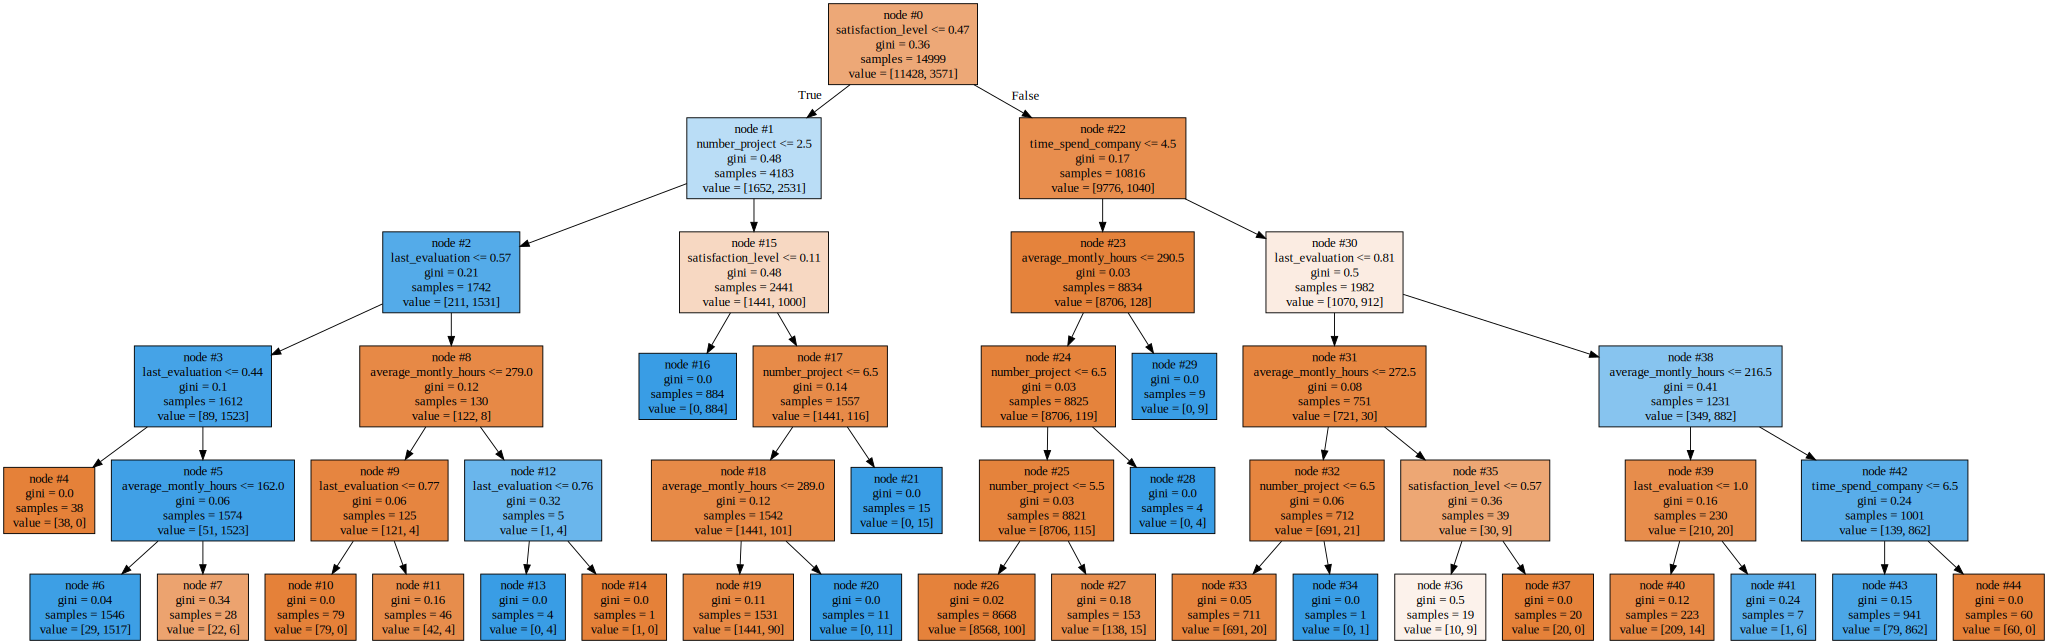

In [13]:
dot_data = tree.export_graphviz(dt_hr, out_file=None, feature_names=feature_set,
                                                filled=True, rotate=False, node_ids=True, precision=2)
graphviz.Source(dot_data)

###  Model performance
In clasification problems, the most used metric to measure model performance is accuracy. <br>

Just pay attention when we have skew dataset (ex, 1% from data have 1 as target variable and 99% from data contain 0 as target variable). In this case we need to look at precision and recall metrics.

todo : <br>
look at model performance at how to win a kaggle competition and add more details here


In [14]:
accuracy_score(dataset[target_variable], dt_hr.predict(dataset[feature_set]) )

0.9755317021134743

This simple decision tree has a pretty good accuracy...should we stop here ? <br>
Are we ready to put this model into production ?

## Decision Tree Classifier v2

###  Train/validation split
The goal of validation dataset is to check model performance on unseen data! 


In [17]:
train_dataset, validation_dataset = train_test_split(dataset[feature_set + [target_variable]], train_size=0.7, stratify=dataset.left)


In [18]:
train_dataset.shape[0], validation_dataset.shape[0]

(10499, 4500)

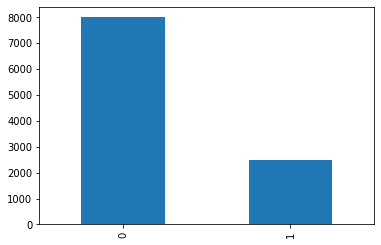

In [19]:
train_dataset.left.value_counts().plot.bar()

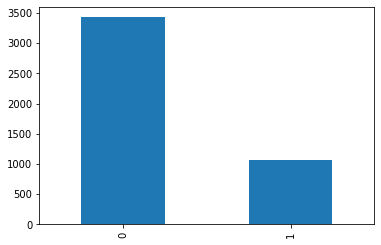

In [20]:
validation_dataset.left.value_counts().plot.bar()

In [19]:
train_accuracy = []
val_accuracy = []
for max_depth in range(1,30):
    dt_v2 = DecisionTreeClassifier(max_depth=max_depth)
    dt_v2.fit(train_dataset[feature_set], train_dataset[target_variable])
    
    print(max_depth)
    print(f"training accuracy : {accuracy_score(train_dataset[target_variable], dt_v2.predict(train_dataset[feature_set]))}")
    print(f"validation accuracy : {accuracy_score(validation_dataset[target_variable], dt_v2.predict(validation_dataset[feature_set]))}")
    train_accuracy.append(accuracy_score(train_dataset[target_variable], dt_v2.predict(train_dataset[feature_set])))
    val_accuracy.append(accuracy_score(validation_dataset[target_variable], dt_v2.predict(validation_dataset[feature_set])))


1
training accuracy : 0.8205543385084294
validation accuracy : 0.8204444444444444
2
training accuracy : 0.8507476902562149
validation accuracy : 0.848
3
training accuracy : 0.9520906753024098
validation accuracy : 0.9548888888888889
4
training accuracy : 0.9684731879226594
validation accuracy : 0.9711111111111111
5
training accuracy : 0.9747595009048481
validation accuracy : 0.9766666666666667
6
training accuracy : 0.9778074102295456
validation accuracy : 0.9791111111111112
7
training accuracy : 0.981426802552624
validation accuracy : 0.9806666666666667
8
training accuracy : 0.9836174873797504
validation accuracy : 0.9806666666666667
9
training accuracy : 0.985236689208496
validation accuracy : 0.9806666666666667
10
training accuracy : 0.9870463853700352
validation accuracy : 0.9802222222222222
11
training accuracy : 0.9883798456995905
validation accuracy : 0.9804444444444445
12
training accuracy : 0.9896180588627488
validation accuracy : 0.9806666666666667
13
training accuracy : 0.991

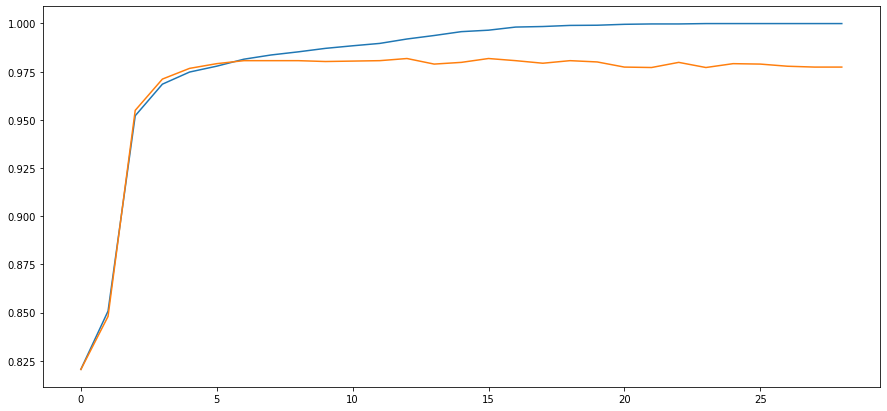

In [20]:
plt.figure(figsize=(15,7))
plt.plot(train_accuracy)
plt.plot(val_accuracy)

### Train the model

In [21]:
dt_v2 = DecisionTreeClassifier(max_depth=4)
dt_v2.fit(train_dataset[feature_set], train_dataset[target_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Model performance

In [22]:
accuracy_score(train_dataset[target_variable], dt_v2.predict(train_dataset[feature_set]))

0.9684731879226594

In [23]:
accuracy_score(validation_dataset[target_variable], dt_v2.predict(validation_dataset[feature_set]))

0.9711111111111111

### Decision tree interpretation

In [24]:
dts = DecisionTreeStructure(dt_v2, train_dataset, feature_set, target_variable)

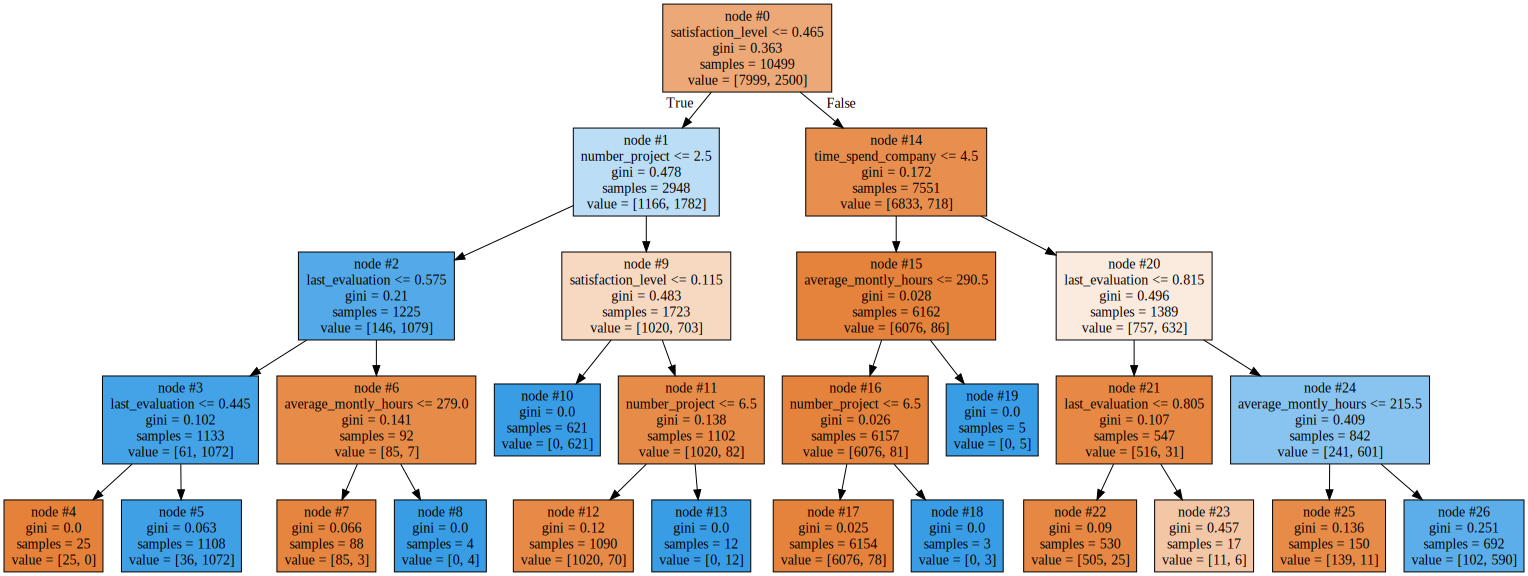

In [25]:
dts.show_decision_tree_structure(rotate=False)

TODO :
- understand how feature importance is calculated by Decision Tree (remember amazon book?)

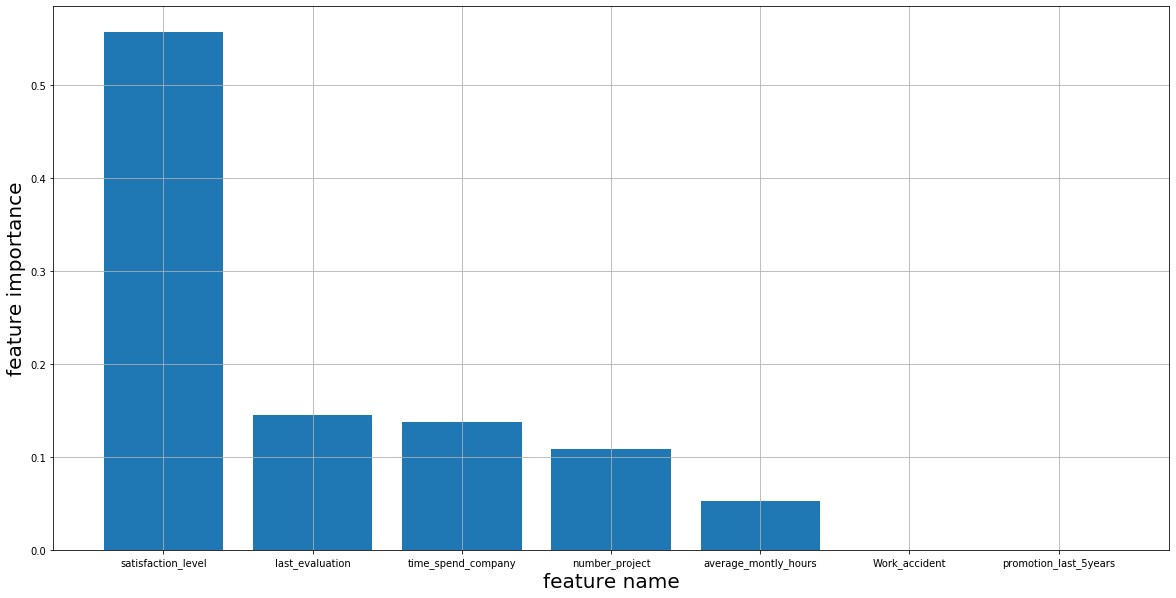

In [26]:
dts.show_features_importance()

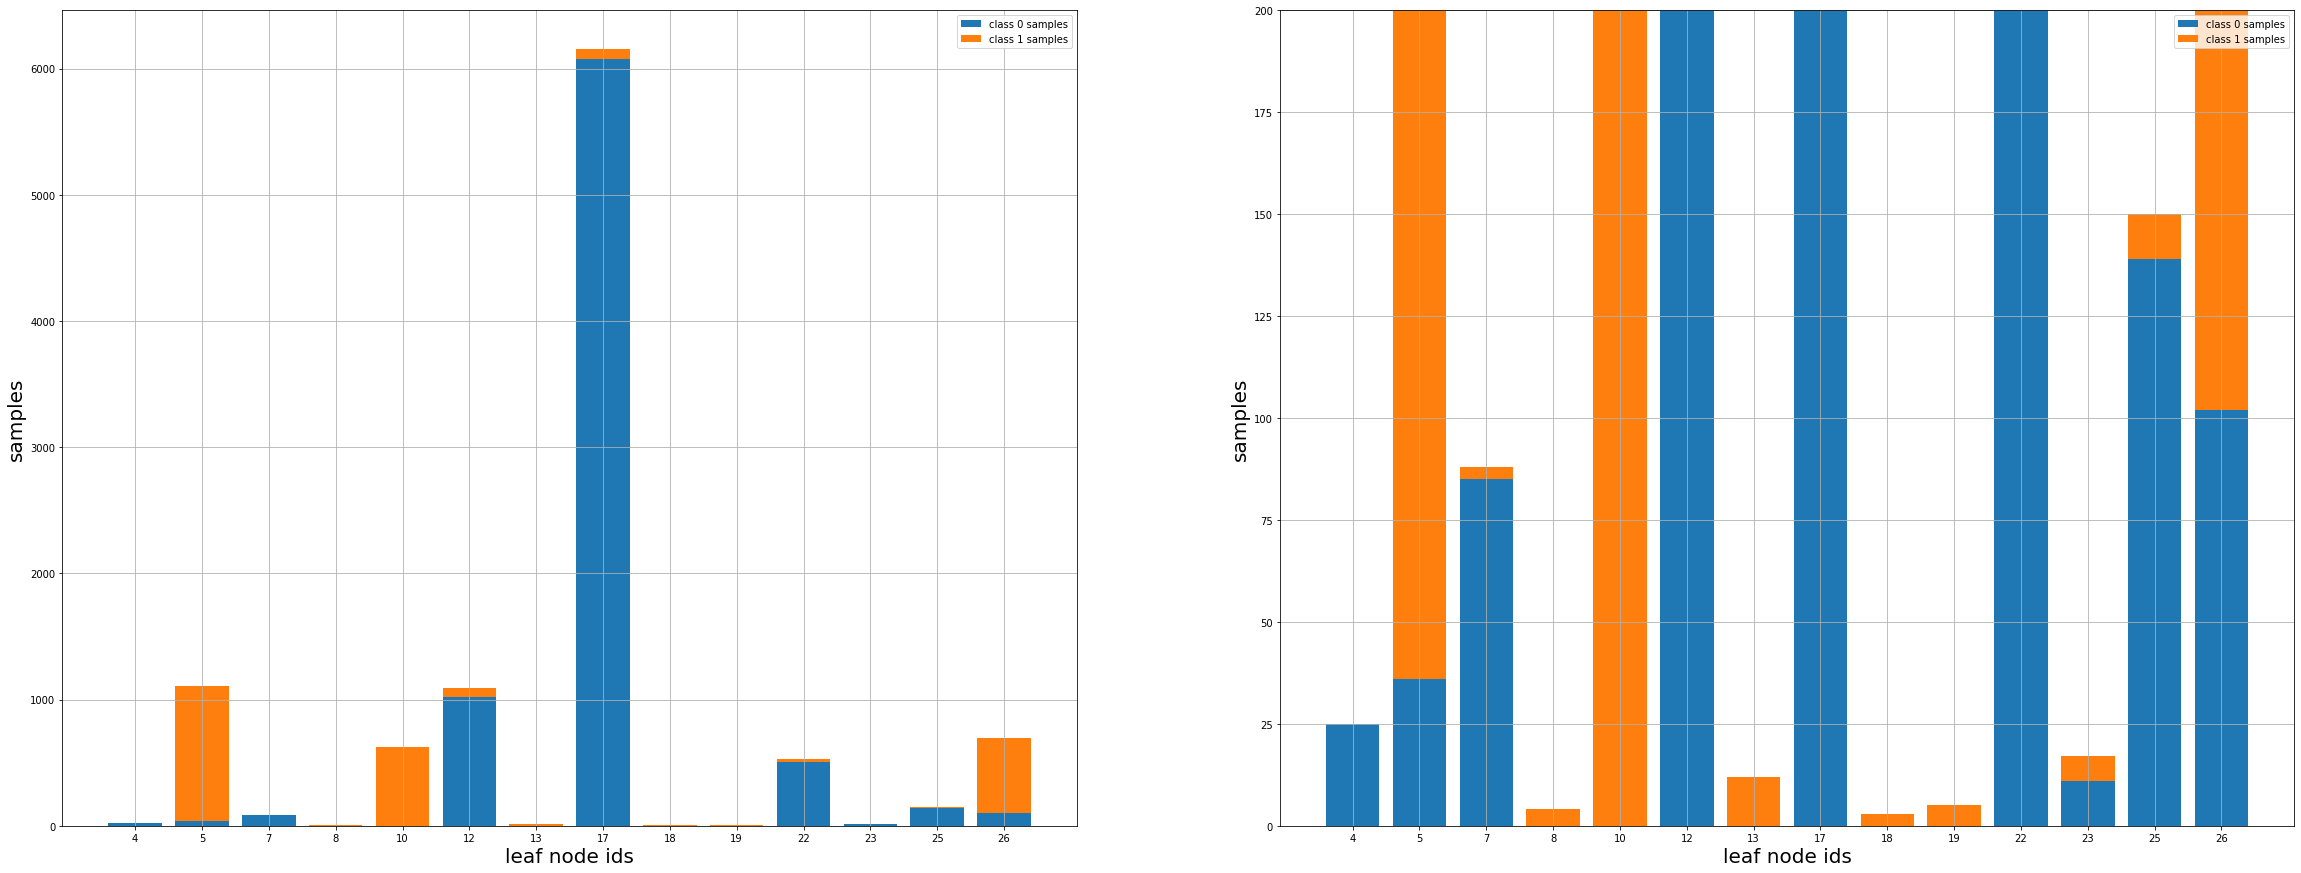

In [53]:
plt.figure(figsize=(40,15))

plt.subplot(1,2,1)
dts.show_leaf_samples_by_class()

plt.subplot(1,2,2)
dts.show_leaf_samples_by_class(plot_ylim=200)

For woodpecker : <br>
- when we have too many samples in a leaf (with impurity >++ 0), it's hard to understand whats happending there even if we display the sample with describe() or in plain dataframe
    - maybe we could apply describe on each class  (DONE)
    - fit another Decision Tree on this samples and apply again woodpecker ? (almost done)

In [65]:
dts.get_node_samples(node_id=25, return_type="describe_by_class")

left                                  0           1
satisfaction_level    count  139.000000   11.000000
                      mean     0.737338    0.700909
                      std      0.149635    0.152280
                      min      0.470000    0.530000
                      25%      0.605000    0.565000
                      50%      0.740000    0.700000
                      75%      0.860000    0.860000
                      max      1.000000    0.890000
last_evaluation       count  139.000000   11.000000
                      mean     0.900863    0.933636
                      std      0.051731    0.065920
                      min      0.820000    0.830000
                      25%      0.860000    0.870000
                      50%      0.900000    0.950000
                      75%      0.940000    0.985000
                      max      0.990000    1.000000
number_project        count  139.000000   11.000000
                      mean     3.928058    3.000000
                      std      1.011816    1.549193
                      min      2.000000    2.000000
                      25%      3.000000    2.000000
                      50%      4.000000    2.000000
                      75%      4.500000    3.000000
                      max      6.000000    6.000000
average_montly_hours  count  139.000000   11.000000
                      mean   162.791367  170.454545
                      std     30.752277   15.539393
                      min     98.000000  155.000000
                      25%    141.000000  159.000000
                      50%    160.000000  164.000000
                      75%    189.000000  181.000000
                      max    215.000000  206.000000
time_spend_company    count  139.000000   11.000000
                      mean     7.158273    5.090909
                      std      1.877630    0.301511
                      min      5.000000    5.000000
                      25%      5.500000    5.000000
                      50%      7.000000    5.000000
                      75%      8.000000    5.000000
                      max     10.000000    6.000000
Work_accident         count  139.000000   11.000000
                      mean     0.179856    0.000000
                      std      0.385457    0.000000
                      min      0.000000    0.000000
                      25%      0.000000    0.000000
                      50%      0.000000    0.000000
                      75%      0.000000    0.000000
                      max      1.000000    0.000000
promotion_last_5years count  139.000000   11.000000
                      mean     0.028777    0.000000
                      std      0.167784    0.000000
                      min      0.000000    0.000000
                      25%      0.000000    0.000000
                      50%      0.000000    0.000000
                      75%      0.000000    0.000000
                      max      1.000000    0.000000

In [67]:
train_tmp = dts.get_node_samples(node_id=25)

In [72]:
dt_tmp = DecisionTreeClassifier(max_depth=1)
dt_tmp.fit(train_tmp[feature_set], train_tmp[target_variable])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
accuracy_score(train_tmp[target_variable], dt_tmp.predict(train_tmp[feature_set]))

0.9266666666666666

In [46]:
dts.get_node_samples(node_id=17).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,6154.000000,6154.000000,6154.000000,6154.00000,6154.000000,6154.000000,6154.000000,6154.000000
mean,0.732202,0.726365,3.724407,201.29493,2.826292,0.165908,0.021774,0.012675
std,0.150914,0.157507,0.889525,43.79878,0.682167,0.372029,0.145958,0.111875
min,0.470000,0.360000,2.000000,96.00000,2.000000,0.000000,0.000000,0.000000
25%,0.600000,0.590000,3.000000,164.00000,2.000000,0.000000,0.000000,0.000000
50%,0.730000,0.730000,4.000000,201.00000,3.000000,0.000000,0.000000,0.000000
75%,0.860000,0.860000,4.000000,240.00000,3.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,287.00000,4.000000,1.000000,1.000000,1.000000


In [47]:
dts.get_node_samples(node_id=12).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,0.264431,0.687459,4.395413,193.199083,4.219266,0.178899,0.023853,0.064220
std,0.100308,0.173987,1.088624,51.426321,1.632598,0.383444,0.152662,0.245257
min,0.120000,0.360000,3.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.180000,0.550000,3.000000,152.000000,3.000000,0.000000,0.000000,0.000000
50%,0.240000,0.690000,4.000000,191.000000,4.000000,0.000000,0.000000,0.000000
75%,0.350000,0.830000,5.000000,236.000000,5.000000,0.000000,0.000000,0.000000
max,0.460000,1.000000,6.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [49]:
dts.get_node_samples(node_id=22).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.728774,0.601321,3.792453,195.916981,6.592453,0.228302,0.088679,0.047170
std,0.159175,0.120703,1.109480,51.566360,1.663559,0.420135,0.284549,0.212202
min,0.470000,0.360000,2.000000,100.000000,5.000000,0.000000,0.000000,0.000000
25%,0.580000,0.510000,3.000000,154.000000,5.000000,0.000000,0.000000,0.000000
50%,0.720000,0.605000,4.000000,197.000000,6.000000,0.000000,0.000000,0.000000
75%,0.880000,0.707500,5.000000,241.750000,8.000000,0.000000,0.000000,0.000000
max,1.000000,0.800000,6.000000,287.000000,10.000000,1.000000,1.000000,1.000000


In [50]:
dts.get_node_samples(node_id=5).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,1108.000000,1108.000000,1108.0,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.405162,0.510469,2.0,144.775271,3.018953,0.055957,0.008123,0.967509
std,0.036310,0.036306,0.0,14.690023,0.282910,0.229942,0.089800,0.177380
min,0.100000,0.450000,2.0,99.000000,2.000000,0.000000,0.000000,0.000000
25%,0.380000,0.480000,2.0,135.000000,3.000000,0.000000,0.000000,1.000000
50%,0.400000,0.510000,2.0,145.000000,3.000000,0.000000,0.000000,1.000000
75%,0.430000,0.540000,2.0,153.000000,3.000000,0.000000,0.000000,1.000000
max,0.460000,0.570000,2.0,285.000000,8.000000,1.000000,1.000000,1.000000


In [51]:
dts.get_node_samples(node_id=10).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.0
mean,0.101353,0.868728,6.209340,276.165862,4.091787,0.046699,0.001610,1.0
std,0.007690,0.063643,0.551809,21.829542,0.330611,0.211163,0.040129,0.0
min,0.090000,0.620000,3.000000,140.000000,2.000000,0.000000,0.000000,1.0
25%,0.100000,0.820000,6.000000,260.000000,4.000000,0.000000,0.000000,1.0
50%,0.100000,0.870000,6.000000,278.000000,4.000000,0.000000,0.000000,1.0
75%,0.110000,0.930000,7.000000,293.000000,4.000000,0.000000,0.000000,1.0
max,0.110000,0.980000,7.000000,310.000000,5.000000,1.000000,1.000000,1.0


In [52]:
dts.get_node_samples(node_id=26).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.802153,0.921980,4.478324,246.472543,5.475434,0.065029,0.017341,0.852601
std,0.090918,0.057374,0.689675,16.753965,1.005472,0.246755,0.130633,0.354759
min,0.480000,0.820000,2.000000,216.000000,5.000000,0.000000,0.000000,0.000000
25%,0.760000,0.870000,4.000000,233.000000,5.000000,0.000000,0.000000,1.000000
50%,0.815000,0.920000,5.000000,245.000000,5.000000,0.000000,0.000000,1.000000
75%,0.870000,0.980000,5.000000,259.000000,6.000000,0.000000,0.000000,1.000000
max,0.980000,1.000000,6.000000,307.000000,10.000000,1.000000,1.000000,1.000000
